<center> <h1> <b>Song Birds<b></h1> </center>
<center> <h2>Model Automatization and Code Update</h2> </center>

# Import Libraries, Functions, and Classes

In [1]:
from classes import *

# Importing Audios

Looking for all wav files in folder, audios path

In [2]:
#birdname      = 'Zonotrichia capensis'  # Nombre del ave
print("Total number of songs: {}".format(len(sound_files)))

Total number of songs: 91


# Choosing File, Silaba, and Chunck

In [3]:
num_file, no_silaba, no_chunck = 2, 2, 0
copeton = Song(sound_files[num_file])
copeton.parametros

{'a0': 0.11,
 'a1': 0.05,
 'b0': -0.2,
 'b1': 1.1,
 'gamma': 60000,
 'b2': 0.0,
 'a2': 0.0}

## Plot Song, Silaba, and Chunck

Number of syllables 6


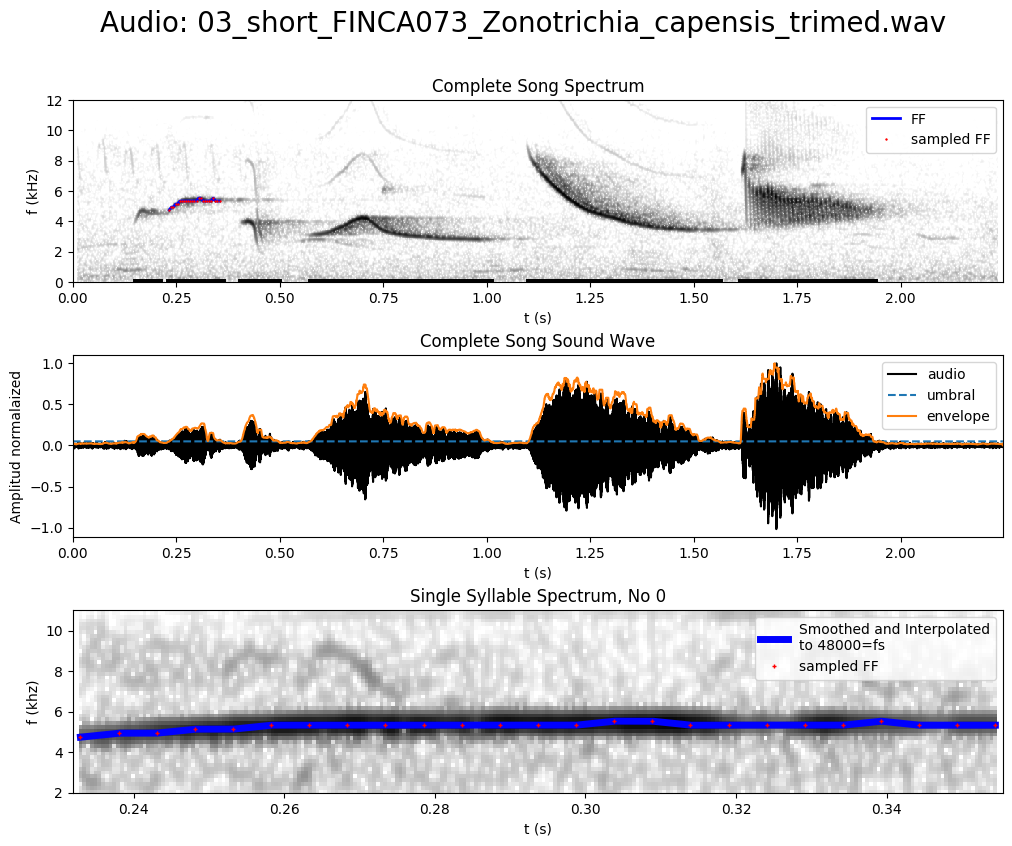

In [4]:
copeton.SilabaNo(no_silaba)
copeton.Chunck(no_chunck)
copeton.Plot(sound_files[num_file], 0)

# Syllable i-th 

## Model Initial Parameters

In [5]:
brute         = {'method':'brute', 'Ns':21}#, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}

## Syllable Object and Plots

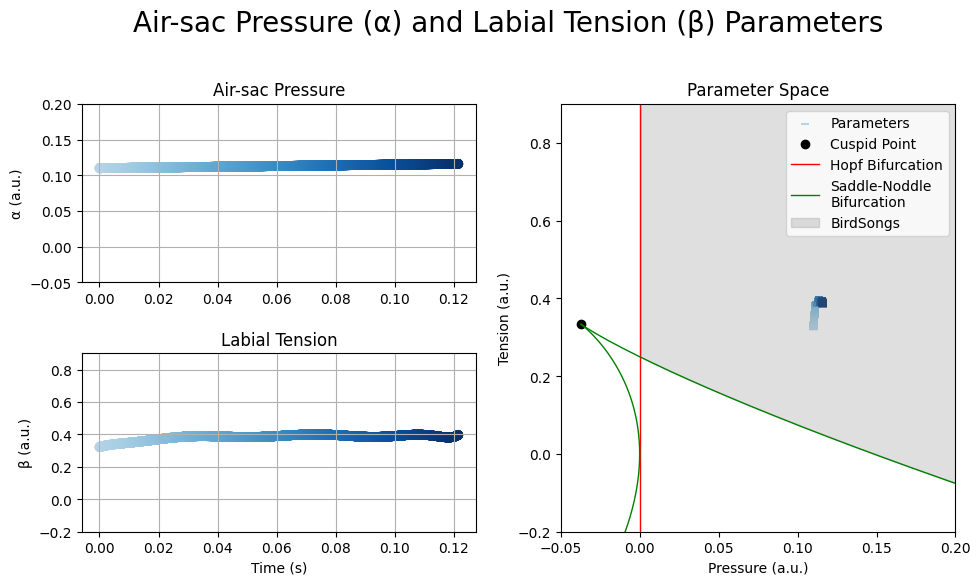

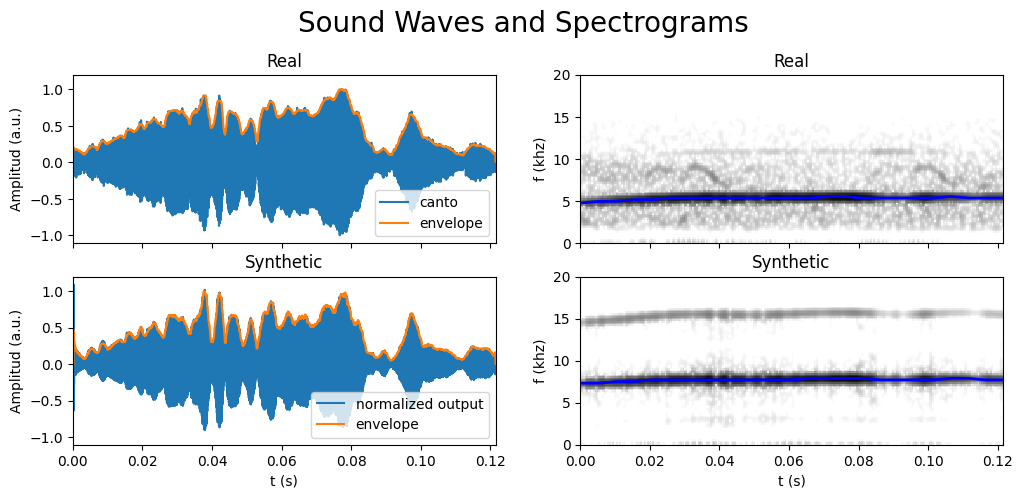

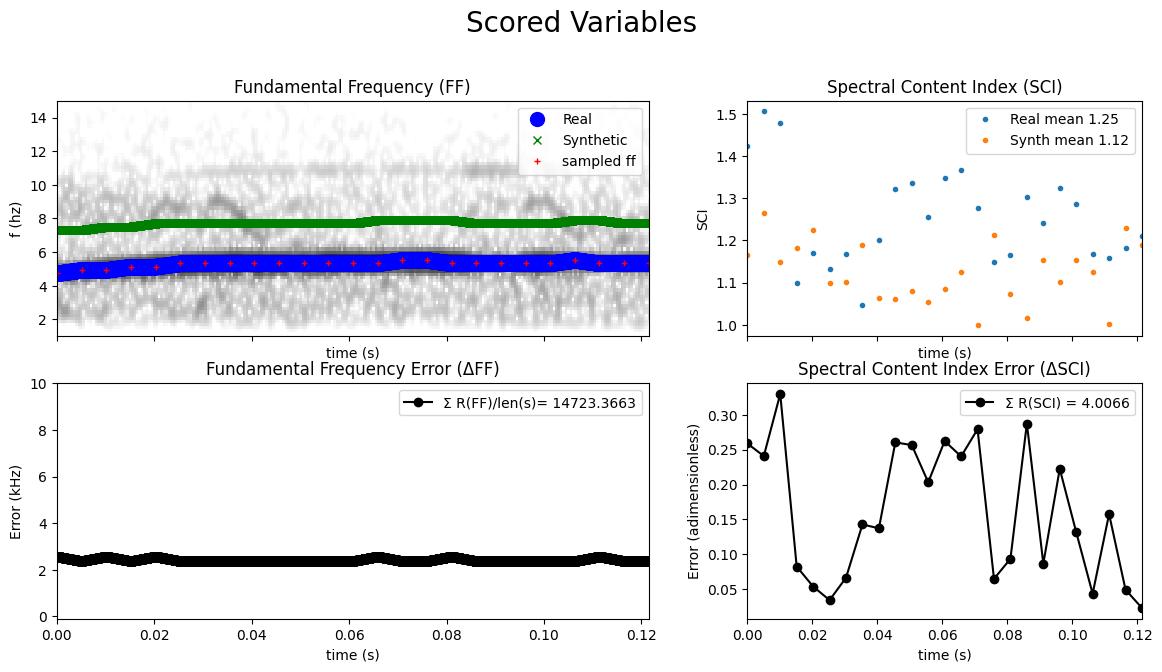

In [6]:
copeton.silaba.OptSCI(copeton.parametros)
copeton.silaba.PlotAlphaBeta()
copeton.silaba.PlotSynth()
copeton.silaba.Plot(0)

In [7]:
#copeton.Chunck(-1)
#copeton.chunck.OptSCI(parametros)
#copeton.chunck.PlotAlphaBeta()
#copeton.chunck.PlotSynth()
#copeton.chunck.Plot(1)

# Silaba i-th 

In [8]:
#copeton.SilabaNo(no_silaba+1)
#copeton.chunck.time.size#

# Optimization Problem γ 

We are interested to solve the following optimization problem

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}}{\text{min}} &\qquad || SCI_{real} - SCI_{synt} ( \gamma)||  \\
    \text { subject to }  & \qquad 0.1 <  \gamma \leq 100000
\end{aligned}
\end{equation}


Finding optimal $\gamma$

In [ ]:
copeton.silaba.FindGammaAndBs(brute)

In [ ]:
brute["Ns"] = 51
copeton.p["gamma"].set(vary=True)
datos, t_exe = copeton.silaba.OptimizationSCI(copeton.p, **brute)  
copeton.p["gamma"].set(value=datos.params["gamma"].value, vary=False)
copeton.parametros["gamma"] = datos.params["gamma"].value #opt_gamma 

print("γ opt =  {0:.4f}".format(copeton.p["gamma"].value))
print("Time of execution {0:.4f} min".format(t_exe/60))

## Tunnig $b_0$ and $b_1$ 

In [ ]:
copeton.parametros

In [ ]:
brute["Ns"] = 21
# ---------------- b1--------------------
copeton.p["b1"].set(vary=True)
datos1, t_exe1 = copeton.silaba.OptimizationFF(copeton.p, **brute) 
copeton.p["b1"].set(vary=False, value=datos.params["b1"].value)
copeton.parametros["b1"] = datos.params["b1"].value

# ---------------- b0--------------------
copeton.p["b0"].set(vary=True)
datos2, t_exe2 = copeton.silaba.OptimizationFF(copeton.p, **brute) 
copeton.p["b0"].set(vary=False, value=datos.params["b0"].value)
copeton.parametros["b0"] = datos.params["b0"].value

print("$b_0=${0:.{4}f}, $b_1=${1:.4f}".format(copeton.params["b0"].value, copeton.params["b1"].value))
print("Time of execution b1={0:.3f} min, b0={1:.3f} min, total={2:.4f}".format(t_exe1/60, t_exe2/60, (t_exe1+t_exe2)/60))

In [ ]:
copeton.silaba.OptSCI(copeton.parametros)
copeton.silaba.PlotAlphaBeta()
copeton.silaba.PlotSynth()
copeton.silaba.Plot(0)

In [ ]:
#y    = np.abs(np.fft.rfft(copeton.silaba.out_amp)) #[5:-5]
#freq = np.fft.rfftfreq(copeton.silaba.out_amp.size, d=1/copeton.fs)#[5:-5]

#freq, y = freq[5:-5], y # remove inital and final peaks
#peaks, _ = find_peaks(y, distance=10, height=np.max(y)/10)
#peaks = peakutils.indexes(y, thres=0.5, min_dist=30)

#plt.plot(freq,y); #plt.xlim((1, 2e4))
#plt.plot(freq[peaks[0]], y[peaks[0]], "x")

In [ ]:
copeton.silaba.Audio(num_file,no_silaba)

## Optimization Problem All Parameters

We are interested to solve the following optimization problem

\begin{equation}
\begin{aligned}
\underset{a,b \in \mathbb{R}^2}{\text{min}} &\qquad || FF_{real} - FF_{synt} (a,b)||  \\
    \text { subject to }  & \qquad -1 <  a_i \leq 1\\
    \qquad \qquad \; \;   & \qquad -1 <  b_i \leq 1, \qquad \text{for }  i=1,2
\end{aligned}
\end{equation}

where

\begin{gather}
\alpha(t) = a_0 + a_1 t, \qquad  \beta(t)=b_0 + b_1 t\\
\alpha(t) = \vec{a} \cdot \vec{\tau}, \qquad \beta(t) =  \vec{b} \cdot \vec{\tau}
\end{gather}

\begin{gather}
\alpha(t) = a_0 + a_1 t, \qquad  \beta(t)=b_0 g(FF_{real}) + b_1
\end{gather}

with $\vec{\tau}=(1,t,t^2)$, $\vec{a} = (a_0, a_1, a_2)$. and $\vec{b}=(b_0, b_1, b_2)$. Since we are looking for lines in the parameter space the parameters $a_2=b_2=0$. 

# Next syllable

In [ ]:
copeton.parametros

In [ ]:
copeton.SilabaNo(no_silaba+2)

copeton.parametros["gamma"] = opt_gamma 
#copeton.p["gamma"].set(value=55000.045, vary=False)

copeton.silaba.OptSCI(copeton.parametros)
copeton.silaba.PlotAlphaBeta()
copeton.silaba.PlotSynth()
copeton.silaba.Plot(0)

In [ ]:
copeton.parametros

# Proposal Functions

In [ ]:
# s, time = copeton.silaba.out_amp, copeton.silaba.time_out
# fs = copeton.silaba.fs
# s_i, t = Windows(s, time, fs)
# i = -2
# f_msf, f_aff, amp = SpectralContentSynth(s_i[i], fs) # method=method
# f_aff#s_i.shape

# maximos = peakutils.indexes(np.abs(np.fft.rfft(s_i[i])), thres=0.15, min_dist=5)

# plt.plot(np.fft.rfftfreq(s_i[i].shape[0], 1/fs),  np.abs(np.fft.rfft(s_i[i])))
# #plt.plot(s_i[i])
# #plt.plot(s)

## Video
- Create a function to make video

```` 
import os
os.system("ffmpeg -f image2 -r 1/5 -i ./images/swissGenevaLake%01d.jpg -vcodec mpeg4 -y ./videos/swissGenevaLake.mp4")
````

- Add audio to the video

````
ffmpeg -i yourvideo.avi -i sound.mp3 -c copy -map 0:v:0 -map 1:a:0 output.avi
````

## Improve Pitch Extractor, extract harmonics

## Improve Normalizer and Envelope

## Make itartion for all sillables